In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix


In [40]:
iris = datasets.load_iris()
X = iris.data[:, :2]  
y_true = iris.target

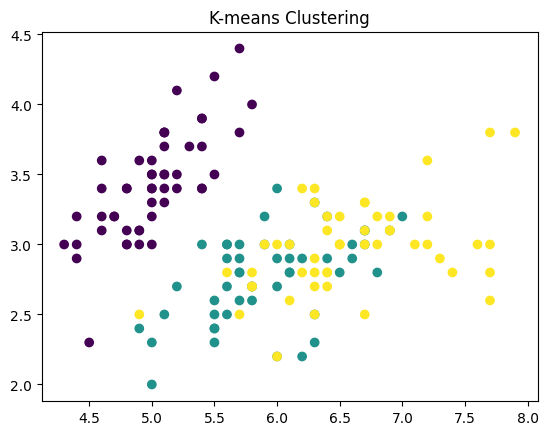

In [44]:
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis')
plt.title('K-means Clustering')
plt.show()

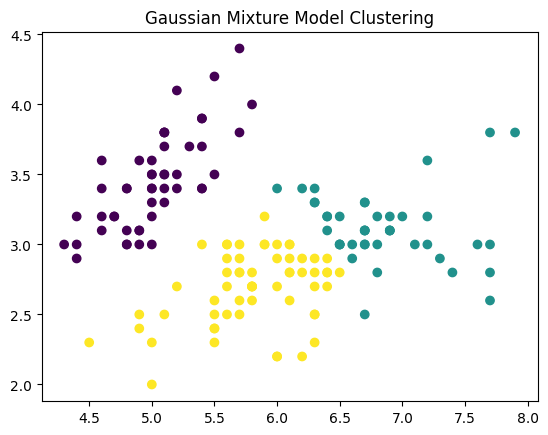

In [42]:
gmm = GaussianMixture(n_components=3)
y_gmm = gmm.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_gmm, cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.show()

K-means Confusion Matrix:
[[ 0  0 50]
 [12 38  0]
 [35 15  0]]


<AxesSubplot:>

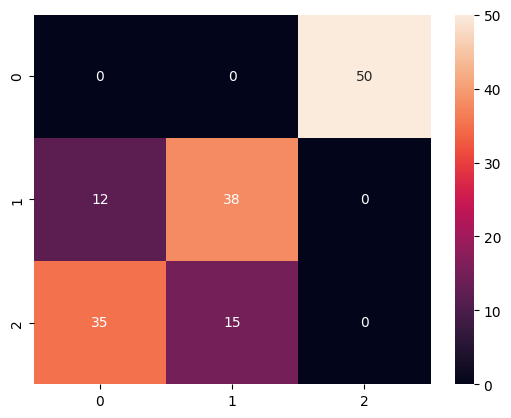

In [47]:
print('K-means Confusion Matrix:')
print(confusion_matrix(y_true, y_kmeans))
c1=confusion_matrix(y_true, y_kmeans)
import seaborn as sns
sns.heatmap(c1,annot=True)



Gaussian Mixture Model Confusion Matrix:
[[49  0  1]
 [ 0 11 39]
 [ 0 31 19]]


<AxesSubplot:>

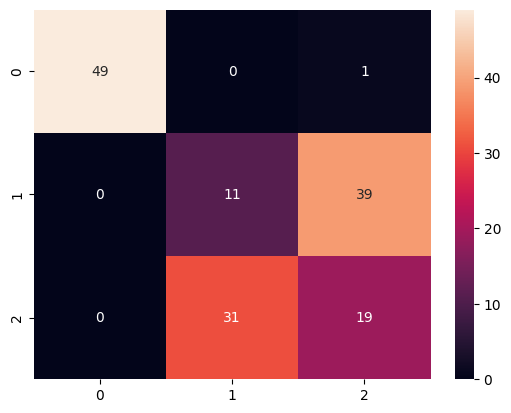

In [46]:
print('Gaussian Mixture Model Confusion Matrix:')
print(confusion_matrix(y_true, y_gmm))
c2=confusion_matrix(y_true, y_gmm)
sns.heatmap(c2,annot=True)

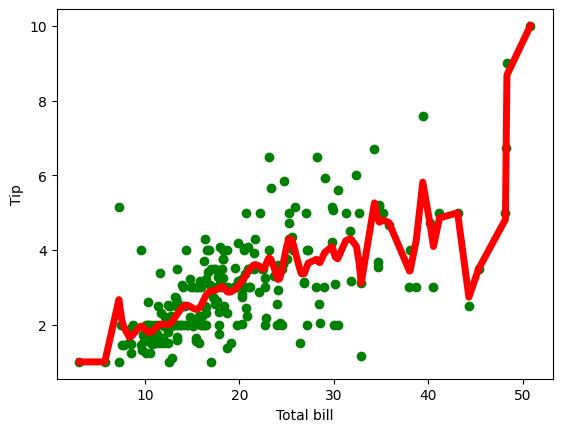

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def kernel(point, xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    for j in range(m):
        diff = point - xmat[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights

def localWeight(point, xmat, ymat, k):
    wei = kernel(point, xmat, k)
    W = (xmat.T * (wei * xmat)).I * (xmat.T * (wei * ymat.T))
    return W
     
def localWeightRegression(xmat, ymat, k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i] * localWeight(xmat[i], xmat, ymat, k)
    return ypred
       
# load data points
data = pd.read_csv('hotel.csv')
bill = np.array(data.total_bill)
tip = np.array(data.tip)
 
#preparing and add 1 in bill
mbill = np.mat(bill)
mtip = np.mat(tip)

m = np.shape(mbill)[1]
one = np.mat(np.ones(m))
X = np.hstack((one.T, mbill.T))

# set k here
ypred = localWeightRegression(X, mtip, 0.5)
SortIndex = X[:,1].argsort(0)
xsort = X[SortIndex][:,0]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(bill, tip, color='green')
ax.plot(xsort[:,1], ypred[SortIndex], color='red', linewidth=5)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show();
